<a href="https://colab.research.google.com/github/antonio1134/IA-ACS/blob/main/p2PerceptronMulticapaAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 115.3361 - val_loss: 91.5583
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.1281 - val_loss: 62.8365
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.4506 - val_loss: 27.3884
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9096 - val_loss: 17.1736
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.2620 - val_loss: 11.3307
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5361 - val_loss: 7.9324
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1398 - val_loss: 6.2539
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6304 - val_loss: 5.3241
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1392 - val_loss: 4.9130
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3081 - val_loss: 4.8294
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3578 - val_loss: 4.6278
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

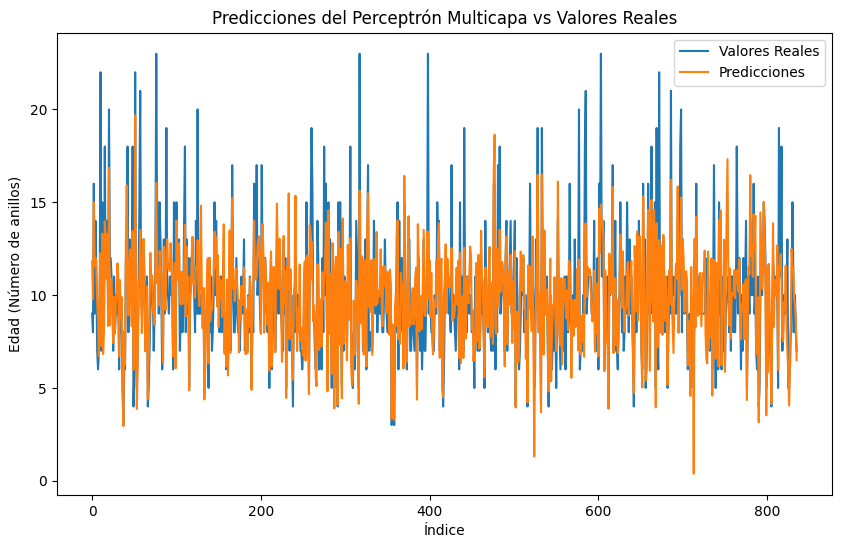

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Cargar el dataset desde la URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data = pd.read_csv(url, names=column_names)

# 2. Preprocesamiento de datos
# Separar características (X) y la variable objetivo (y)
X = data.drop(columns=['Rings'])
y = data['Rings']

# Convertir la columna categórica 'Sex' usando One-Hot Encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Sex'])
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Definir el Perceptrón Multicapa (MLP)
model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # 16 neuronas en la capa oculta

# Segunda capa oculta
model.add(Dense(8, activation='relu'))  # 8 neuronas en la segunda capa oculta

# Capa de salida
model.add(Dense(1, activation='linear'))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 5. Evaluar el modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse:.4f}')

# 6. Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Edad (Número de anillos)')
plt.legend()
plt.title('Predicciones del Perceptrón Multicapa vs Valores Reales')
plt.show()
